Requirements:

```
pip install matplotlib numpy networkx
pip install qiskit qiskit_ibm_provider
```

In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
%%html
<style>
    .output_svg div{
        max-width: 100% !important;
        height: auto !important;
    }
</style>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from numpy import pi
import networkx as nx

## Qiskit reference documentation: https://qiskit.org/documentation/

- Qiskit Terra reference page: https://qiskit.org/documentation/apidoc/terra.html
- Quantum circuits reference page: https://qiskit.org/documentation/apidoc/circuit.html
- `QuantumCircuit` class: https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
- `AerSimulator` class: https://qiskit.org/documentation/stubs/qiskit_aer.AerSimulator.html#qiskit_aer.AerSimulator
- `execute` function: https://qiskit.org/documentation/apidoc/execute.html
- `transpile` function: https://qiskit.org/documentation/apidoc/transpiler.html
- `IBMQ` object: https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQFactory.html
- Visualizations: https://qiskit.org/documentation/apidoc/visualization.html
- Optimizers: https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.html
- mock/fake backends: https://qiskit.org/documentation/apidoc/providers_fake_provider.html

Further resources:
- IBM Quantum homepage: https://quantum-computing.ibm.com/
- IBM Qiskit Textbook: https://qiskit.org/textbook/preface.html
- Pennylane: https://pennylane.ai/qml/demonstrations.html
- D-Wave Leap Examples: https://cloud.dwavesys.com/leap/resources
- Google Quantum AI on YouTube: https://www.youtube.com/c/QuantumAI
- Quantinuum's TKET compiler documentation: https://cqcl.github.io/tket/pytket/api/
- Stim https://github.com/quantumlib/Stim

In [4]:
import qiskit
qiskit.__version__

'0.23.1'

In [131]:
from qiskit import QuantumCircuit, execute, transpile, IBMQ
from qiskit.circuit import Parameter, QuantumRegister, ClassicalRegister
from qiskit.providers.aer import AerSimulator
from qiskit.providers.ibmq.job import job_monitor
from qiskit.quantum_info import Statevector, DensityMatrix, Operator, Pauli
from qiskit.visualization import (plot_histogram, plot_distribution,
                                  plot_bloch_multivector, plot_gate_map)
from qiskit.visualization.bloch import Bloch
from qiskit.algorithms.optimizers import (
    COBYLA, # Constrained Optimization BY Linear Approximation, cf. doi:10.1007/978-94-015-8330-5_4
    SPSA,   # Simultaneous Perturbation Stochastic Approximation, cf. https://www.jhuapl.edu/SPSA/
    ADAM,   # Based on ADAptive Moment estimation, cf. arXiv:1412.6980
    #...      many more optimizers available
)
from qiskit_ibm_provider import IBMProvider

In [19]:
provider = IBMProvider()
backend = provider.get_backend("ibmq_manila")
simulator = AerSimulator.from_backend(backend)
ideal_simulator = AerSimulator()

In [21]:
theta = Parameter("θ")
phi = Parameter("φ")
lam = Parameter("λ")

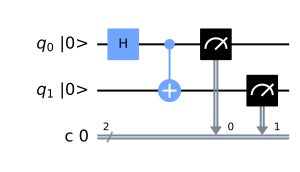

In [22]:
circ = QuantumCircuit(2, 2) # |00>
circ.h(0) # H on q0
circ.cx(0, 1) # CX on q0 (ctrl) and q1 (trgt)
circ.measure([0, 1], # measure qubits q0 and q1
             [0, 1]) # outcomes in bits b0 and b1 resp.
circ.draw("mpl", initial_state=True)

In [23]:
backend.configuration().to_dict()

{'backend_name': 'ibmq_manila',
 'backend_version': '1.1.4',
 'n_qubits': 5,
 'basis_gates': ['cx', 'id', 'rz', 'sx', 'x'],
 'gates': [{'name': 'id',
   'parameters': [],
   'qasm_def': 'gate id q { U(0, 0, 0) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'rz',
   'parameters': ['theta'],
   'qasm_def': 'gate rz(theta) q { U(0, 0, theta) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'sx',
   'parameters': [],
   'qasm_def': 'gate sx q { U(pi/2, 3*pi/2, pi/2) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'x',
   'parameters': [],
   'qasm_def': 'gate x q { U(pi, 0, pi) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'cx',
   'parameters': [],
   'qasm_def': 'gate cx q0, q1 { CX q0, q1; }',
   'coupling_map': [[0, 1],
    [1, 0],
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 2],
    [3, 4],
    [4, 3]]},
  {'name': 'reset', 'parameters': None, 'qasm_def': None}],
 'local': False,
 'simulator': False,
 'conditional': 

In [24]:
props = backend.properties().to_dict()
props

{'backend_name': 'ibmq_manila',
 'backend_version': '1.1.4',
 'last_update_date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
 'qubits': [[{'date': datetime.datetime(2023, 2, 27, 15, 20, 38, tzinfo=tzlocal()),
    'name': 'T1',
    'unit': 'us',
    'value': 108.36564443606954},
   {'date': datetime.datetime(2023, 2, 27, 6, 25, 3, tzinfo=tzlocal()),
    'name': 'T2',
    'unit': 'us',
    'value': 78.24655687494572},
   {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
    'name': 'frequency',
    'unit': 'GHz',
    'value': 4.962278564486562},
   {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
    'name': 'anharmonicity',
    'unit': 'GHz',
    'value': -0.3446254135384113},
   {'date': datetime.datetime(2023, 2, 27, 6, 16, 11, tzinfo=tzlocal()),
    'name': 'readout_error',
    'unit': '',
    'value': 0.02959999999999996},
   {'date': datetime.datetime(2023, 2, 27, 6, 16, 11, tzinfo=tzlocal()),
    'name': 'prob_meas0_pre

In [25]:
props["qubits"][0] # data for q0

[{'date': datetime.datetime(2023, 2, 27, 15, 20, 38, tzinfo=tzlocal()),
  'name': 'T1',
  'unit': 'us',
  'value': 108.36564443606954},
 {'date': datetime.datetime(2023, 2, 27, 6, 25, 3, tzinfo=tzlocal()),
  'name': 'T2',
  'unit': 'us',
  'value': 78.24655687494572},
 {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
  'name': 'frequency',
  'unit': 'GHz',
  'value': 4.962278564486562},
 {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
  'name': 'anharmonicity',
  'unit': 'GHz',
  'value': -0.3446254135384113},
 {'date': datetime.datetime(2023, 2, 27, 6, 16, 11, tzinfo=tzlocal()),
  'name': 'readout_error',
  'unit': '',
  'value': 0.02959999999999996},
 {'date': datetime.datetime(2023, 2, 27, 6, 16, 11, tzinfo=tzlocal()),
  'name': 'prob_meas0_prep1',
  'unit': '',
  'value': 0.04379999999999995},
 {'date': datetime.datetime(2023, 2, 27, 6, 16, 11, tzinfo=tzlocal()),
  'name': 'prob_meas1_prep0',
  'unit': '',
  'value': 0.0154},
 {'date': d

In [26]:
props["gates"][0]

{'qubits': [0],
 'gate': 'id',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 6, 29, 27, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.0011775488582345776},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 35.55555555555556}],
 'name': 'id0'}

In [27]:
props["gates"][9]

{'qubits': [4],
 'gate': 'rz',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 0}],
 'name': 'rz4'}

In [28]:
props["gates"][14]

{'qubits': [4],
 'gate': 'sx',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 6, 29, 27, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.00041408325972639587},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 35.55555555555556}],
 'name': 'sx4'}

In [29]:
props["gates"][20]

{'qubits': [4, 3],
 'gate': 'cx',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 7, 56, 18, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.005129036359242278},
  {'date': datetime.datetime(2023, 2, 24, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 298.66666666666663}],
 'name': 'cx4_3'}

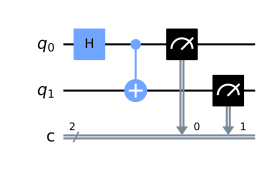

In [30]:
circ.draw("mpl")

In [76]:
job = execute(circ, ideal_simulator, shots=1000) # default for shots is 1024
job

In [77]:
result = job.result()
result

Result(backend_name='aer_simulator', backend_version='0.11.2', qobj_id='6a660e60-50a4-4e3d-9d7a-740f626c8f24', job_id='e7f5043f-7336-49eb-8389-501a504c0a6c', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 480, '0x0': 520}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-578', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=1157996124, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0013331, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.0031565)], date=2023-02-27T16:09:35.249505, status=

In [78]:
counts = result.get_counts()
counts

{'11': 480, '00': 520}

In [79]:
sum(counts.values())

1000

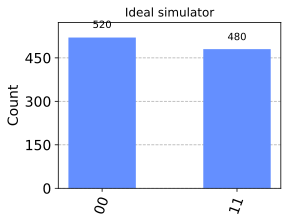

In [80]:
plot_histogram(counts, figsize=(4, 3), title="Ideal simulator")

In [81]:
%%time
for shots in [100, 500, 1000, 5000, 10_000, 50_000, 100_000, 500_000]:
    job = execute(circ, ideal_simulator, shots=shots)
    counts = job.result().get_counts()
    print(f"{shots: >7} shots =>", ", ".join(f"'{bitstr}': {counts[bitstr]/shots:.2%}"for bitstr in sorted(counts)))

    100 shots => '00': 45.00%, '11': 55.00%
    500 shots => '00': 49.80%, '11': 50.20%
   1000 shots => '00': 47.20%, '11': 52.80%
   5000 shots => '00': 49.62%, '11': 50.38%
  10000 shots => '00': 50.63%, '11': 49.37%
  50000 shots => '00': 49.65%, '11': 50.35%
 100000 shots => '00': 50.30%, '11': 49.70%
 500000 shots => '00': 50.05%, '11': 49.95%
CPU times: total: 1.88 s
Wall time: 1.88 s


In [89]:
job = execute(circ, simulator, shots=1000) # noisy simulator based on IBMQ Manila
counts = job.result().get_counts()
counts

{'00': 469, '11': 484, '01': 27, '10': 20}

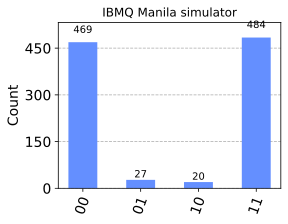

In [90]:
plot_histogram(counts, figsize=(4, 3), title="IBMQ Manila simulator")

In [87]:
%%time
for shots in [100, 500, 1000, 5000, 10_000, 50_000, 100_000, 500_000]:
    job = execute(circ, simulator, shots=shots)
    _counts = job.result().get_counts()
    print(f"{shots: >7} shots =>", ", ".join(f"'{bitstr}': {_counts[bitstr]/shots:.2%}"for bitstr in sorted(_counts)))

    100 shots => '00': 49.00%, '01': 2.00%, '10': 7.00%, '11': 42.00%
    500 shots => '00': 44.40%, '01': 2.20%, '10': 3.80%, '11': 49.60%
   1000 shots => '00': 48.40%, '01': 2.00%, '10': 2.50%, '11': 47.10%
   5000 shots => '00': 47.30%, '01': 2.92%, '10': 3.06%, '11': 46.72%
  10000 shots => '00': 46.95%, '01': 2.98%, '10': 3.35%, '11': 46.72%
  50000 shots => '00': 46.94%, '01': 3.00%, '10': 3.13%, '11': 46.93%
 100000 shots => '00': 47.33%, '01': 3.07%, '10': 3.04%, '11': 46.56%
 500000 shots => '00': 47.05%, '01': 3.09%, '10': 3.13%, '11': 46.74%
CPU times: total: 6.73 s
Wall time: 2.57 s


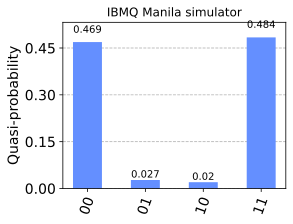

In [91]:
plot_distribution(counts, figsize=(4, 3), title="IBMQ Manila simulator")

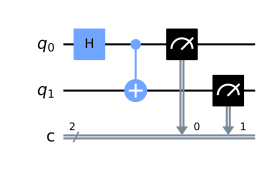

In [92]:
circ.draw("mpl")

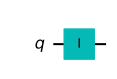

In [93]:
circ = QuantumCircuit(1)
circ.i(0)
circ.draw("mpl")

In [94]:
props["gates"][0]

{'qubits': [0],
 'gate': 'id',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 6, 29, 27, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.0011775488582345776},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 35.55555555555556}],
 'name': 'id0'}

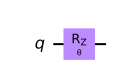

In [97]:
circ = QuantumCircuit(1)
circ.rz(theta, 0)
circ.draw("mpl")

In [98]:
props["gates"][5]

{'qubits': [0],
 'gate': 'rz',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 0}],
 'name': 'rz0'}

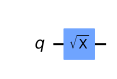

In [103]:
circ = QuantumCircuit(1)
circ.sx(0) # rx(pi/2, 0)
circ.draw("mpl")

In [104]:
props["gates"][10]

{'qubits': [0],
 'gate': 'sx',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 6, 29, 27, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.0011775488582345776},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 35.55555555555556}],
 'name': 'sx0'}

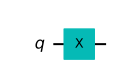

In [100]:
circ = QuantumCircuit(1)
circ.x(0) # NOT gate, rx(pi, 0)
circ.draw("mpl")

In [102]:
props["gates"][15]

{'qubits': [0],
 'gate': 'x',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 6, 29, 27, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.0011775488582345776},
  {'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 35.55555555555556}],
 'name': 'x0'}

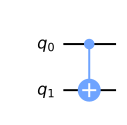

In [107]:
circ = QuantumCircuit(2)
circ.cx(0, 1) # CNOT gate
circ.draw("mpl")

In [108]:
props["gates"][20]

{'qubits': [4, 3],
 'gate': 'cx',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 7, 56, 18, tzinfo=tzlocal()),
   'name': 'gate_error',
   'unit': '',
   'value': 0.005129036359242278},
  {'date': datetime.datetime(2023, 2, 24, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 298.66666666666663}],
 'name': 'cx4_3'}

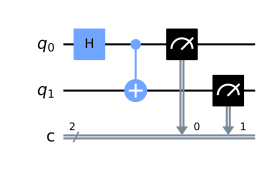

In [112]:
circ = QuantumCircuit(2, 2) # |00>
circ.h(0) # H on q0
circ.cx(0, 1) # CX on q0 (ctrl) and q1 (trgt)
circ.measure([0, 1], # measure qubits q0 and q1
             [0, 1]) # outcomes in bits b0 and b1 resp.
circ.draw("mpl")

Compile onto a given set of basis gates:

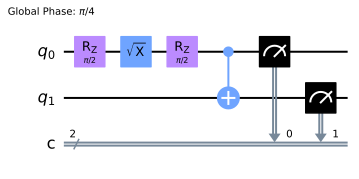

In [117]:
circ_t = transpile(circ, basis_gates=["id", "rz", "sx", "x", "cx"])
circ_t.draw("mpl")

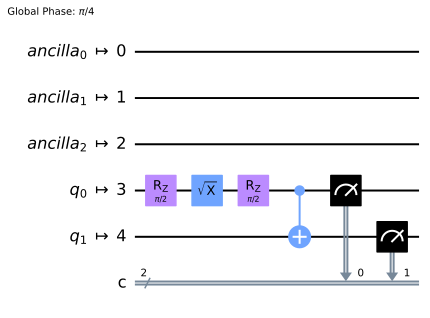

In [118]:
logical_to_physical = [
    3, # <- q0
    4  # <- q1
]
circ_t = transpile(circ, backend, initial_layout=logical_to_physical)
circ_t.draw("mpl")

In [120]:
job = execute(circ_t, simulator, shots=100_000) # noisy simulator based on IBMQ Manila
counts = job.result().get_counts()
counts

{'00': 48271, '11': 47178, '01': 2309, '10': 2242}

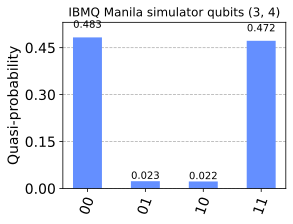

In [121]:
plot_distribution(counts, figsize=(4, 3), title="IBMQ Manila simulator qubits (3, 4)")

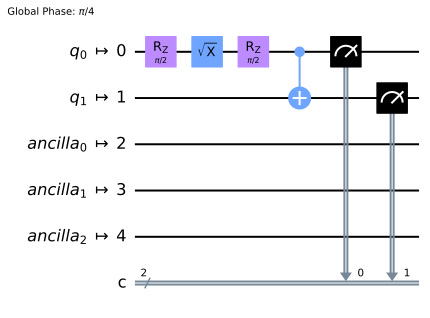

In [124]:
circ_t = transpile(circ, backend, initial_layout=[0, 1])
circ_t.draw("mpl")

In [122]:
job = execute(circ_t, simulator, shots=100_000) # noisy simulator based on IBMQ Manila
counts = job.result().get_counts()
counts

{'00': 47061, '10': 3125, '11': 46766, '01': 3048}

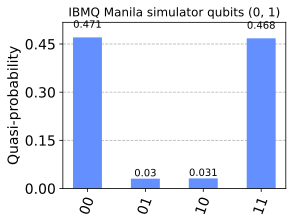

In [123]:
plot_distribution(counts, figsize=(4, 3), title="IBMQ Manila simulator qubits (0, 1)")

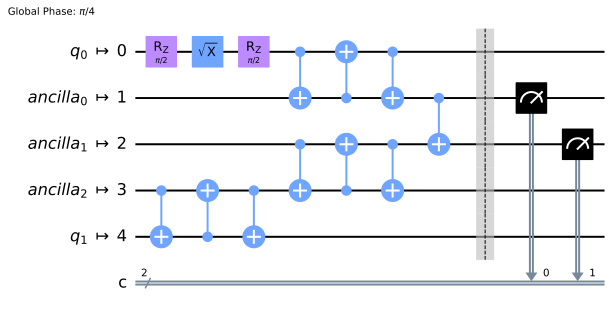

In [125]:
circ_t = transpile(circ, backend, initial_layout=[0, 4])
circ_t.draw("mpl")

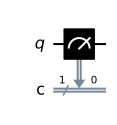

In [128]:
circ = QuantumCircuit(1, 1)
circ.measure(0, 0) # Z basis measurement
circ.draw("mpl")

Indirect measurement of qubit `q0`:

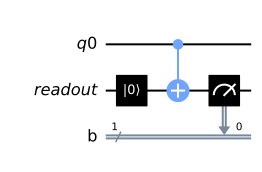

In [144]:
circ = QuantumCircuit(QuantumRegister(1, "q0"),       # qubit on the chip, can't measure directly
                      QuantumRegister(1, "readout"), # readout qubit, connected to the outside world
                      ClassicalRegister(1, "b"))     # readout line/classical register
circ.reset(1)
circ.cx(0, 1)
circ.measure(1, 0)
circ.draw("mpl")

The `reset` gate is REALLY EXPENSIVE. 

In [160]:
props["gates"][28]

{'qubits': [0],
 'gate': 'reset',
 'parameters': [{'date': datetime.datetime(2023, 2, 27, 15, 27, 59, tzinfo=tzlocal()),
   'name': 'gate_length',
   'unit': 'ns',
   'value': 5514.666666666666}],
 'name': 'reset0'}

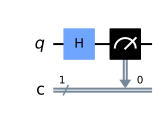

In [145]:
circ = QuantumCircuit(1, 1)
# X basis measurement:
circ.h(0)          # X -> Z
circ.measure(0, 0) # Z basis measurement
circ.draw("mpl")

E.g. measure $\frac{1}{\sqrt{2}}(|0\rangle+|+\rangle)$ in the X basis:

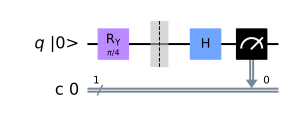

In [149]:
circ = QuantumCircuit(1, 1) # starts in |0>
circ.ry(pi/4, 0) # q0 is in 1/sqrt(2)(|0>+|+>)
# Perform a X basis measurement:
circ.barrier()
circ.h(0)
circ.measure(0, 0)
circ.draw("mpl", initial_state=True)

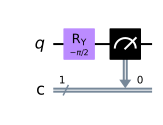

In [150]:
circ = QuantumCircuit(1, 1)
# X basis measurement:
circ.ry(-pi/2, 0)  # X -> Z
circ.measure(0, 0) # Z basis measurement
circ.draw("mpl")

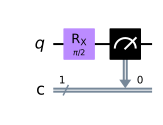

In [151]:
circ = QuantumCircuit(1, 1)
# Y basis measurement:
circ.rx(pi/2, 0)   # Y -> Z
circ.measure(0, 0) # Z basis measurement
circ.draw("mpl")

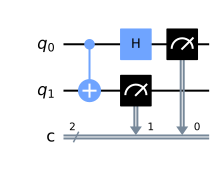

In [153]:
circ = QuantumCircuit(2, 2)
# Bell basis measurement:
circ.cx(0, 1)
circ.h(0)
circ.measure([0, 1], [0, 1]) # (Z,Z) basis measurement
circ.draw("mpl")

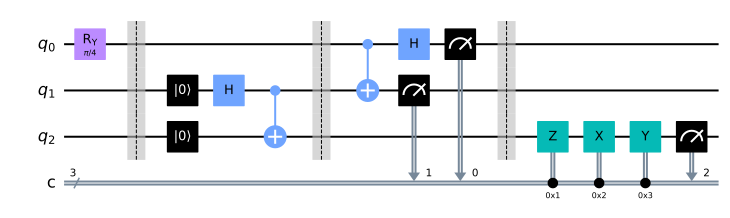

In [177]:
teleport = QuantumCircuit(3, 3)
teleport.ry(pi/4, 0) # q0 is in 1/sqrt(2)(|0>+|+>)
teleport.barrier()
# 1. Create Bell state:
teleport.reset([1, 2]) # wouldn't do it in practice, make sure q1 and q2 in |00> by other means
teleport.h(1)
teleport.cx(1, 2)
teleport.barrier()
# 2. Measure in the Bell basis:
teleport.cx(0, 1)
teleport.h(0)
teleport.measure([0, 1], [0, 1])
teleport.barrier()
# 3. Apply corrections:
teleport.z(2).c_if(teleport.cregs[0], 0b001)
teleport.x(2).c_if(teleport.cregs[0], 0b010)
teleport.y(2).c_if(teleport.cregs[0], 0b011)
# 4. Measure output state:
teleport.measure(2, 2)
teleport.draw("mpl")

In [178]:
job = execute(teleport, simulator, shots=1000)
counts = job.result().get_counts()
counts

{'010': 211,
 '001': 180,
 '100': 49,
 '111': 46,
 '011': 218,
 '110': 56,
 '000': 198,
 '101': 42}

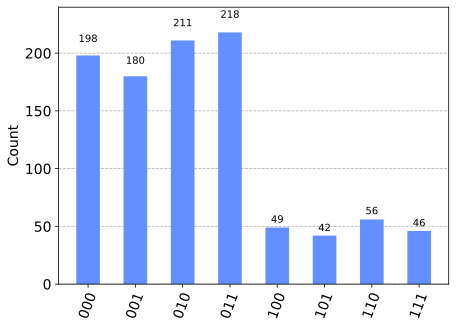

In [179]:
plot_histogram(counts)